In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import squarify
import seaborn as sns
from mplsoccer import Pitch

In [2]:
df = pd.read_csv("/Users/dhruvishah/Desktop/testfinal.csv") 

In [3]:
df.drop('Unnamed: 30', axis=1, inplace=True)
df.drop('Unnamed: 31', axis=1, inplace=True)

In [4]:
df.head(5)

Season Venue Result  GF  GA      Opponent   xG  xGA  Poss  Sh  ...  PSxG  \
0  20-21  Home      W   4   3  Leeds United  2.7  0.3    49  20  ...   0.5   
1  20-21  Away      W   2   0       Chelsea  2.1  0.9    61  18  ...   1.3   
2  20-21  Home      W   3   1       Arsenal  2.7  1.3    66  21  ...   2.0   
3  20-21  Away      L   2   7   Aston Villa  1.8  2.7    69  14  ...   4.7   
4  20-21  Away      D   2   2       Everton  2.6  1.2    58  22  ...   1.2   

   prog_pass_dist  touches_defpen  touches_def_third  touches_mid_third  \
0            2549              35                131                269   
1            3233              29                114                473   
2            3726              50                185                521   
3            3016              70                232                373   
4            2781              54                150                345   

   touches_attk_third  touches_attkpen  tackles_def_third  tackles_mid_third  \
0                 220               44                  2                  7   
1                 317               38                  2                  6   
2                 218               32                  2                  7   
3                 218               43                  5                  7   
4                 185               37                  4                 11   

   tackles_attk_third  
0                   4  
1                   6  
2                   1  
3                   2  
4                   3  

[5 rows x 30 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Season              190 non-null    object 
 1   Venue               190 non-null    object 
 2   Result              190 non-null    object 
 3   GF                  190 non-null    int64  
 4   GA                  190 non-null    int64  
 5   Opponent            190 non-null    object 
 6   xG                  190 non-null    float64
 7   xGA                 190 non-null    float64
 8   Poss                190 non-null    int64  
 9   Sh                  190 non-null    int64  
 10  SoT                 190 non-null    int64  
 11  pass_Cmp            190 non-null    int64  
 12  pass_Att            190 non-null    int64  
 13  pass_Cmp%           190 non-null    float64
 14  Tackles             189 non-null    float64
 15  Tackles_W           189 non-null    float64
 16  Int     

In [6]:
df_home = df[df.Venue== "Home"]

In [7]:
df_home

Season Venue Result  GF  GA        Opponent   xG  xGA  Poss  Sh  ...  \
0    20-21  Home      W   4   3    Leeds United  2.7  0.3    49  20  ...   
2    20-21  Home      W   3   1         Arsenal  2.7  1.3    66  21  ...   
5    20-21  Home      W   2   1   Sheffield Utd  2.3  1.6    62  17  ...   
6    20-21  Home      W   2   1        West Ham  1.7  0.3    72   8  ...   
8    20-21  Home      W   3   0  Leicester City  3.1  1.6    56  24  ...   
..     ...   ...    ...  ..  ..             ...  ...  ...   ...  ..  ...   
180  17-18  Home      W   2   0   Newcastle Utd  1.5  0.3    70  14  ...   
182  17-18  Home      W   5   0         Watford  2.3  0.4    58  13  ...   
185  17-18  Home      W   3   0     Bournemouth  2.0  0.3    61  20  ...   
187  17-18  Home      D   0   0      Stoke City  1.9  0.6    71  20  ...   
189  17-18  Home      W   4   0        Brighton  2.8  0.1    72  22  ...   

     PSxG  prog_pass_dist  touches_defpen  touches_def_third  \
0     0.5            2549              35                131   
2     2.0            3726              50                185   
5     1.0            3354              82                218   
6     0.6            3194              34                124   
8     1.0            2646              48                159   
..    ...             ...             ...                ...   
180   0.6            4544              52                201   
182   0.3            3323              54                162   
185   0.2            3280              49                139   
187   0.1            3762              40                158   
189   0.0            4056              34                156   

     touches_mid_third  touches_attk_third  touches_attkpen  \
0                  269                 220               44   
2                  521                 218               32   
5                  416                 215               29   
6                  601                 230               31   
8                  421                 156               31   
..                 ...                 ...              ...   
180                521                 198               25   
182                426                 138               34   
185                438                 209               34   
187                409                 238               40   
189                479                 236               43   

     tackles_def_third  tackles_mid_third  tackles_attk_third  
0                    2                  7                   4  
2                    2                  7                   1  
5                    4                  1                   2  
6                    3                  2                   5  
8                    4                  1                   4  
..                 ...                ...                 ...  
180                  9                 12                   5  
182                  8                  7                   3  
185                  5                 17                   4  
187                  4                  2                   0  
189                  2                  4                   4  

[95 rows x 30 columns]

In [8]:
df_home.reset_index(inplace=True)

In [9]:
seasons = ['21-22','20-21', '19-20', '18-19', '17-18']

In [10]:
home_goals = []
for i in seasons:
    try:
        goals = sum(df_home.GF[df_home.Season == i])
        home_goals.append(goals)
    except:
        continue

In [11]:
home_goals

[49, 29, 52, 55, 45]

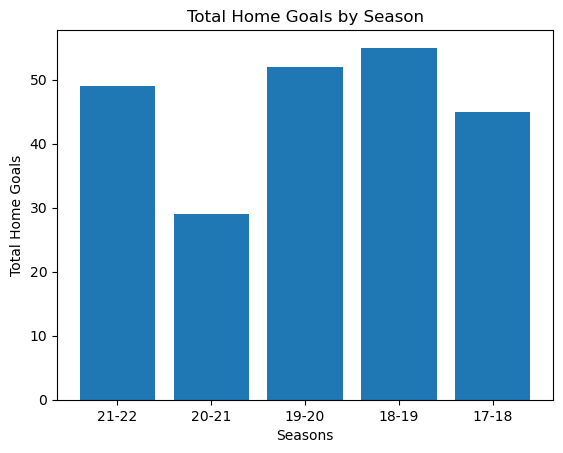

In [12]:
plt.bar(seasons, home_goals)
plt.plot()
plt.xlabel('Seasons')
plt.ylabel('Total Home Goals')
plt.title("Total Home Goals by Season")
plt.show()

In [13]:
df_away = df[df.Venue== "Away"]
df_away.reset_index(inplace=True)
away_goals = []
for i in seasons:
    try:
        goals = sum(df_away.GF[df_away.Season == i])
        away_goals.append(goals)
    except:
        continue

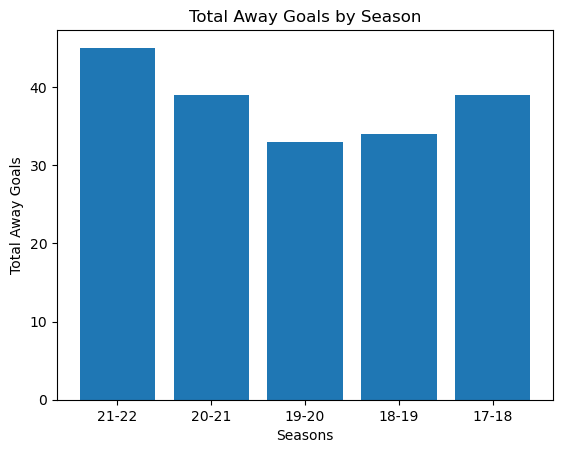

In [14]:
plt.bar(seasons, away_goals)
plt.plot()
plt.xlabel('Seasons')
plt.ylabel('Total Away Goals')
plt.title("Total Away Goals by Season")
plt.show()

In [15]:
home_wins = []
home_draws = []
home_losses = []
for i in seasons: 
    try:
        goals = df_home[df_home.Season == i]
        home_wins.append(len(goals[goals.Result=='W']))
        home_draws.append(len(goals[goals.Result=='D']))
        home_losses.append(len(goals[goals.Result=='L']))
    except:
        continue

In [16]:
home_losses

[0, 6, 0, 0, 0]

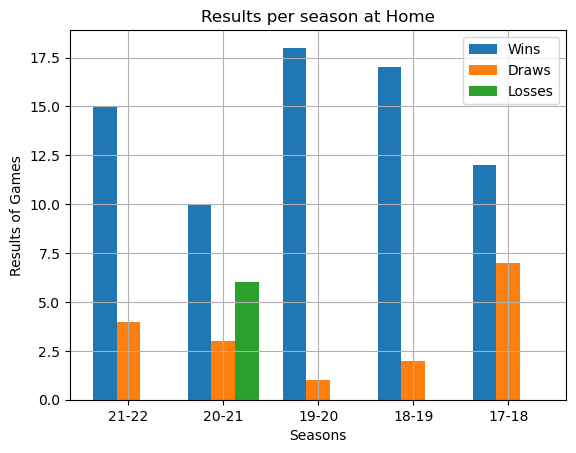

In [17]:
n=5
r = np.arange(n)
width = 0.25
plt.bar(r, home_wins, label='Wins', width=width)
plt.bar(r+width, home_draws, label='Draws', width=width)
plt.bar(r+width*2, home_losses, label='Losses', width=width)
plt.xticks(r+width,seasons)
plt.xlabel('Seasons')
plt.ylabel('Results of Games')
plt.title("Results per season at Home")
plt.legend(loc='best')
plt.grid()
plt.show()

In [18]:
away_wins = []
away_draws = []
away_losses = []
for i in seasons: 
    try:
        goals = df_away[df_away.Season == i]
        away_wins.append(len(goals[goals.Result=='W']))
        away_draws.append(len(goals[goals.Result=='D']))
        away_losses.append(len(goals[goals.Result=='L']))
    except:
        continue

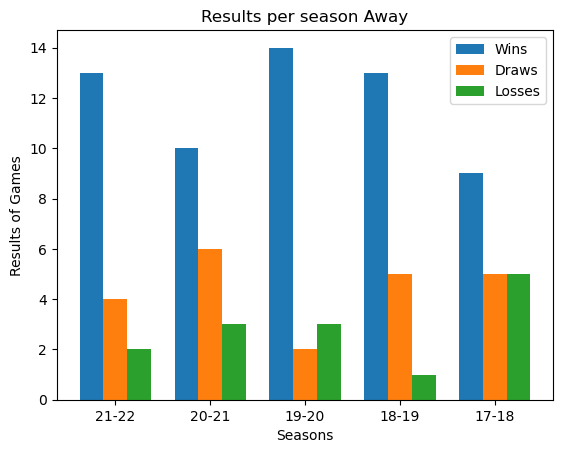

In [19]:
n=5
r = np.arange(n)
width = 0.25
plt.bar(r, away_wins, label='Wins', width=width)
plt.bar(r+width, away_draws, label='Draws', width=width)
plt.bar(r+width*2, away_losses, label='Losses', width=width)
plt.xticks(r+width,seasons)
plt.xlabel('Seasons')
plt.ylabel('Results of Games')
plt.title("Results per season Away")
plt.legend(loc='best')
plt.show()

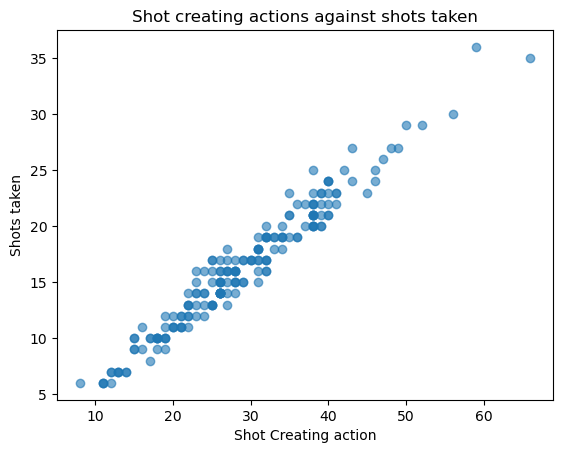

In [20]:
plt.scatter(df.SCA, df.Sh, alpha = 0.6)
plt.xlabel('Shot Creating action')
plt.ylabel('Shots taken')
plt.title("Shot creating actions against shots taken")
plt.show()

In [21]:
opponents = df.Opponent.unique().tolist()

In [22]:
wins = []
draws = []
losses = []
for i in opponents:
    tab = df[df.Opponent == i]
    try:
        winp = (len(tab.Result[tab.Result=="W"])/len(tab.Result))*100
        lossp = (len(tab.Result[tab.Result=="L"])/len(tab.Result))*100
        drawp = (len(tab.Result[tab.Result=="D"])/len(tab.Result))*100
        wins.append(winp)
        draws.append(drawp)
        losses.append(lossp)
    except:
        continue        

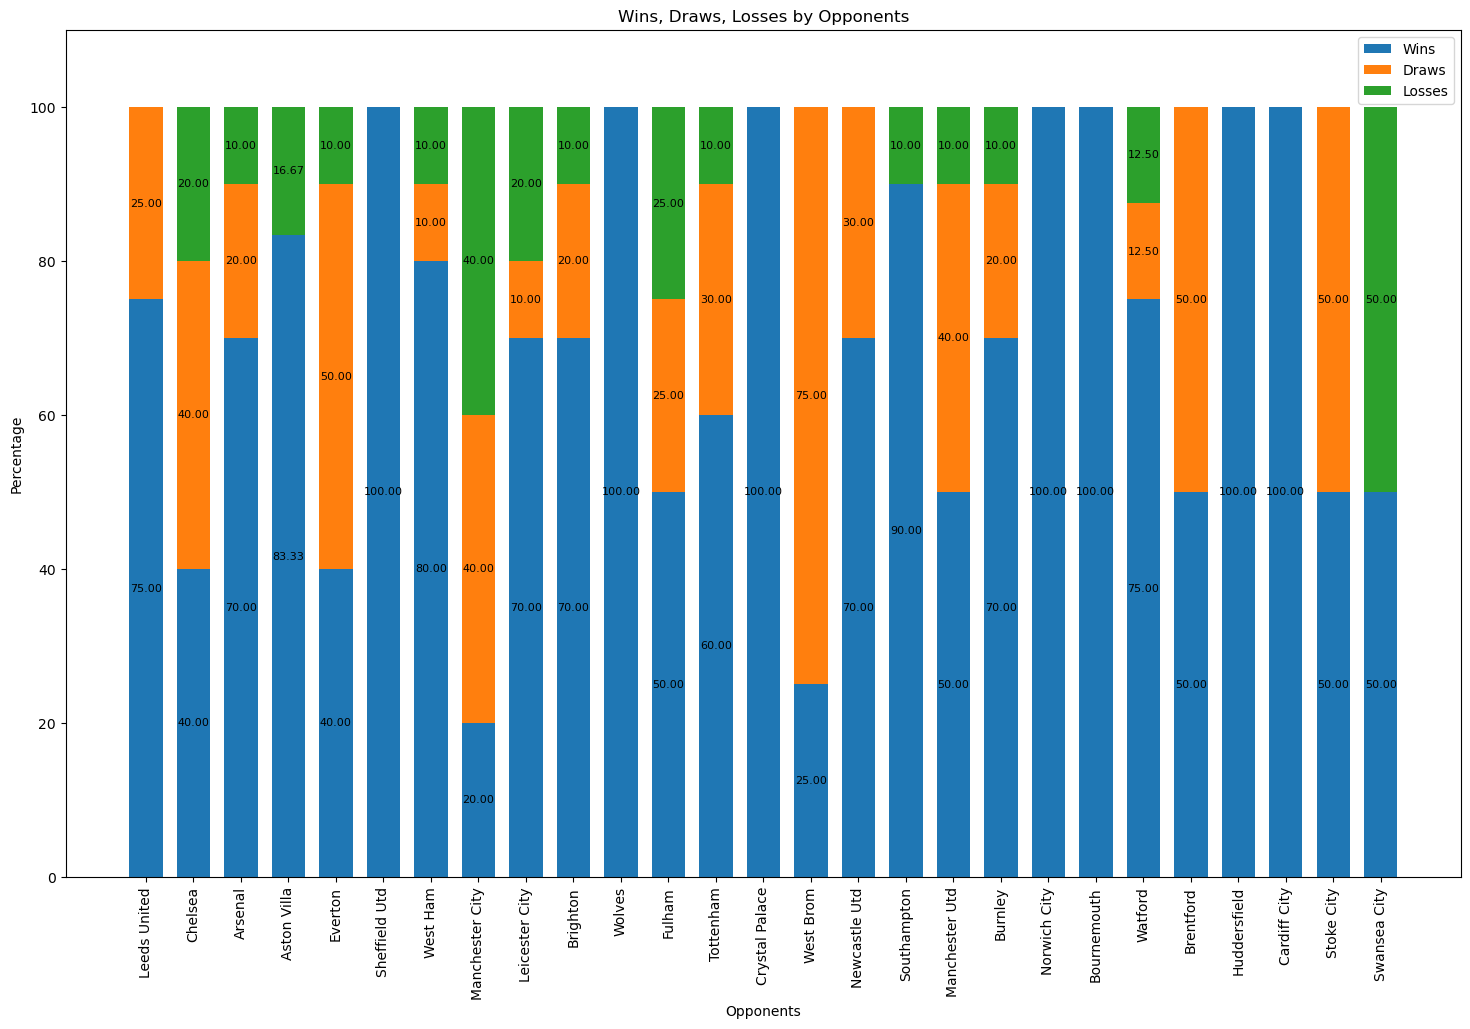

In [23]:
n=len(opponents)
r = np.arange(n)
width = 0.7
fig, ax = plt.subplots(figsize=(18, 11))
ax.bar(opponents, wins, label = "Wins", width=width)
ax.bar(opponents, draws, bottom = wins, label = "Draws",width=width)
ax.bar(opponents, losses, bottom = np.add(wins, draws), label = "Losses",width=width)
plt.xticks(rotation=90)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend()
ax.set_ylabel('Percentage')
ax.set_xlabel('Opponents')
ax.set_ylim(0,110)
plt.title("Wins, Draws, Losses by Opponents")
plt.show() 

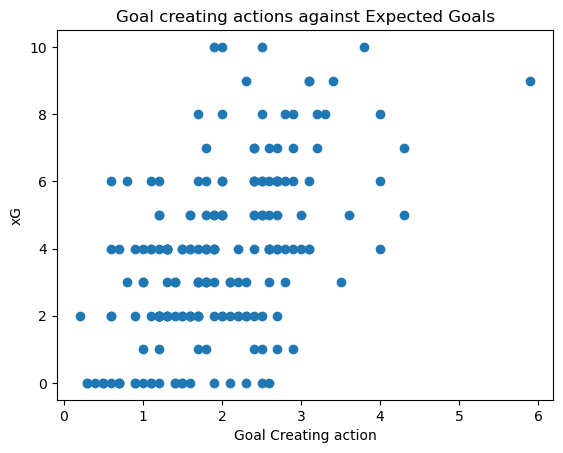

In [24]:
plt.scatter(df.xG, df.GCA, alpha = 1)
plt.xlabel('Goal Creating action')
plt.ylabel('xG')
plt.title("Goal creating actions against Expected Goals")
plt.show()

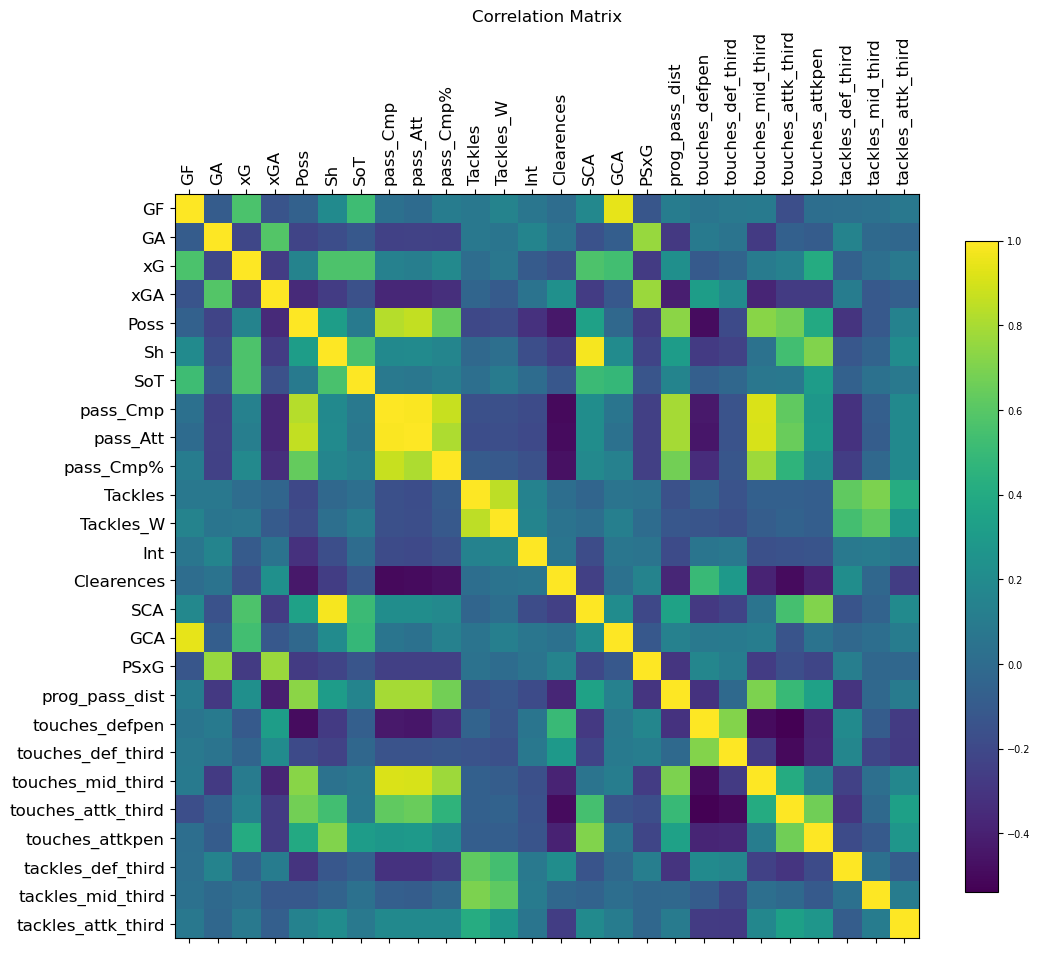

In [25]:
f = plt.figure(figsize=(12, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=7)
plt.xticks(rotation=90)
plt.title('Correlation Matrix', fontsize=12);

# Correlation 22-21

In [26]:
df[df.Season == '21-22'].corr()

GF        GA        xG       xGA      Poss  \
GF                  1.000000 -0.169761  0.612694  0.011004  0.113999   
GA                 -0.169761  1.000000 -0.402351  0.472615 -0.220045   
xG                  0.612694 -0.402351  1.000000 -0.243832  0.249653   
xGA                 0.011004  0.472615 -0.243832  1.000000 -0.362835   
Poss                0.113999 -0.220045  0.249653 -0.362835  1.000000   
Sh                  0.093829 -0.370670  0.534362 -0.226431  0.436531   
SoT                 0.517124 -0.349639  0.609026 -0.154525  0.064799   
pass_Cmp            0.299203 -0.212097  0.218757 -0.354173  0.805768   
pass_Att            0.253403 -0.206053  0.186517 -0.349789  0.837363   
pass_Cmp%           0.406858 -0.187520  0.342603 -0.280027  0.534237   
Tackles            -0.216429 -0.083767 -0.303541 -0.034348 -0.044969   
Tackles_W          -0.110093  0.022111 -0.338935  0.006226 -0.011164   
Int                -0.110697  0.342858 -0.200125 -0.009641 -0.288242   
Clearences         -0.047046  0.127793 -0.179396  0.336191 -0.512930   
SCA                 0.121918 -0.335850  0.538258 -0.168983  0.407214   
GCA                 0.956617 -0.073365  0.514192  0.073724  0.083425   
PSxG               -0.008864  0.681426 -0.328537  0.795223 -0.375713   
prog_pass_dist      0.426077 -0.294772  0.368025 -0.334952  0.632854   
touches_defpen      0.194769  0.151642 -0.091828  0.160941 -0.538125   
touches_def_third   0.345459 -0.084284  0.050950 -0.035558 -0.229323   
touches_mid_third   0.387243 -0.279302  0.239260 -0.319453  0.767239   
touches_attk_third -0.278746  0.002105  0.000639 -0.203913  0.648177   
touches_attkpen    -0.085111 -0.163908  0.373394 -0.304847  0.385895   
tackles_def_third  -0.238912 -0.007162 -0.256178  0.040290 -0.034771   
tackles_mid_third  -0.230319 -0.057670 -0.226255 -0.087912 -0.223835   
tackles_attk_third  0.140352 -0.081184 -0.008388 -0.007216  0.219867   

                          Sh       SoT  pass_Cmp  pass_Att  pass_Cmp%  ...  \
GF                  0.093829  0.517124  0.299203  0.253403   0.406858  ...   
GA                 -0.370670 -0.349639 -0.212097 -0.206053  -0.187520  ...   
xG                  0.534362  0.609026  0.218757  0.186517   0.342603  ...   
xGA                -0.226431 -0.154525 -0.354173 -0.349789  -0.280027  ...   
Poss                0.436531  0.064799  0.805768  0.837363   0.534237  ...   
Sh                  1.000000  0.530019  0.270283  0.271531   0.266009  ...   
SoT                 0.530019  1.000000  0.021462  0.014943   0.061505  ...   
pass_Cmp            0.270283  0.021462  1.000000  0.990099   0.823554  ...   
pass_Att            0.271531  0.014943  0.990099  1.000000   0.739778  ...   
pass_Cmp%           0.266009  0.061505  0.823554  0.739778   1.000000  ...   
Tackles             0.036707 -0.210193 -0.063622 -0.072997  -0.032680  ...   
Tackles_W          -0.042085 -0.221991 -0.001405 -0.002438  -0.021359  ...   
Int                -0.284890 -0.012717 -0.119626 -0.109896  -0.129821  ...   
Clearences         -0.183741 -0.011375 -0.572362 -0.594932  -0.374669  ...   
SCA                 0.975468  0.495336  0.246522  0.243871   0.260107  ...   
GCA                 0.059390  0.429328  0.301307  0.253611   0.409317  ...   
PSxG               -0.272445 -0.218742 -0.290245 -0.294908  -0.207110  ...   
prog_pass_dist      0.149832  0.034696  0.803828  0.789817   0.668126  ...   
touches_defpen     -0.470980 -0.015016 -0.364382 -0.407266  -0.162749  ...   
touches_def_third  -0.422282  0.087666 -0.064509 -0.100703   0.058463  ...   
touches_mid_third   0.213616  0.045577  0.948000  0.936753   0.783241  ...   
touches_attk_third  0.544654 -0.037896  0.577848  0.628839   0.283489  ...   
touches_attkpen     0.712439  0.225878  0.205066  0.217669   0.157579  ...   
tackles_def_third   0.014632 -0.146189 -0.171720 -0.171836  -0.161090  ...   
tackles_mid_third  -0.116112 -0.235793 -0.162404 -0.173481  -0.120386  ...   
tackles_attk_third  0.189310  0.051662  0.270092  0.2

# Correlation 20-21

In [27]:
df[df.Season == '20-21'].corr()

GF        GA        xG       xGA      Poss  \
GF                  1.000000 -0.069155  0.624773 -0.287850 -0.178738   
GA                 -0.069155  1.000000 -0.017734  0.598524  0.001719   
xG                  0.624773 -0.017734  1.000000 -0.262481 -0.057771   
xGA                -0.287850  0.598524 -0.262481  1.000000 -0.212400   
Poss               -0.178738  0.001719 -0.057771 -0.212400  1.000000   
Sh                  0.152821 -0.101685  0.599832 -0.213456  0.194850   
SoT                 0.451741  0.011199  0.594718 -0.050008  0.060759   
pass_Cmp           -0.049380 -0.104133 -0.018456 -0.246944  0.803708   
pass_Att           -0.102304 -0.086721 -0.040154 -0.258431  0.835666   
pass_Cmp%           0.133965 -0.159602  0.056702 -0.155002  0.565583   
Tackles             0.036729  0.186687  0.012928  0.184709 -0.110025   
Tackles_W           0.207006  0.040514 -0.023057  0.066035 -0.156442   
Int                 0.125983  0.155998 -0.124317  0.051962 -0.200797   
Clearences          0.194230 -0.202726  0.097006  0.061374 -0.238902   
SCA                 0.139798 -0.035764  0.589168 -0.249056  0.213412   
GCA                 0.954881  0.003662  0.592964 -0.244934 -0.162313   
PSxG               -0.281697  0.763013 -0.190094  0.722135  0.117828   
prog_pass_dist     -0.089804 -0.190592  0.039436 -0.374621  0.742352   
touches_defpen     -0.062069  0.037808  0.074372  0.336179 -0.338778   
touches_def_third   0.050285  0.060122  0.015481  0.164514  0.043817   
touches_mid_third   0.095675 -0.152861  0.041715 -0.287166  0.630867   
touches_attk_third -0.359808  0.059799 -0.085598 -0.126850  0.649149   
touches_attkpen    -0.144415  0.150022  0.256910 -0.187482  0.247891   
tackles_def_third  -0.033165  0.092285 -0.043997  0.340814 -0.151638   
tackles_mid_third   0.151166  0.090116 -0.019846 -0.082196 -0.137527   
tackles_attk_third -0.088262  0.124916  0.119621 -0.001682  0.188652   

                          Sh       SoT  pass_Cmp  pass_Att  pass_Cmp%  ...  \
GF                  0.152821  0.451741 -0.049380 -0.102304   0.133965  ...   
GA                 -0.101685  0.011199 -0.104133 -0.086721  -0.159602  ...   
xG                  0.599832  0.594718 -0.018456 -0.040154   0.056702  ...   
xGA                -0.213456 -0.050008 -0.246944 -0.258431  -0.155002  ...   
Poss                0.194850  0.060759  0.803708  0.835666   0.565583  ...   
Sh                  1.000000  0.541558  0.008899  0.029390  -0.080591  ...   
SoT                 0.541558  1.000000  0.032502 -0.005208   0.145431  ...   
pass_Cmp            0.008899  0.032502  1.000000  0.990903   0.855029  ...   
pass_Att            0.029390 -0.005208  0.990903  1.000000   0.782741  ...   
pass_Cmp%          -0.080591  0.145431  0.855029  0.782741   1.000000  ...   
Tackles            -0.191085 -0.035825 -0.109435 -0.119207  -0.065284  ...   
Tackles_W          -0.271245  0.025060 -0.157986 -0.182617  -0.087744  ...   
Int                -0.206941  0.005304 -0.169801 -0.147083  -0.234935  ...   
Clearences         -0.061256  0.060343 -0.245073 -0.282192  -0.084341  ...   
SCA                 0.974330  0.471434  0.033854  0.053984  -0.050779  ...   
GCA                 0.154979  0.377290 -0.047564 -0.102658   0.134806  ...   
PSxG               -0.103629  0.014665  0.078422  0.093014   0.024262  ...   
prog_pass_dist      0.270773  0.171920  0.814787  0.817408   0.646856  ...   
touches_defpen      0.042494  0.008836 -0.343625 -0.364886  -0.164629  ...   
touches_def_third  -0.103791  0.020274  0.026787  0.031436   0.081617  ...   
touches_mid_third  -0.163704  0.060068  0.874879  0.854602   0.768614  ...   
touches_attk_third  0.420327 -0.053934  0.572927  0.617954   0.284126  ...   
touches_attkpen     0.707909  0.240880 -0.045983  0.004102  -0.250519  ...   
tackles_def_third  -0.258766 -0.069124 -0.249606 -0.274924  -0.087450  ...   
tackles_mid_third  -0.091505  0.095208 -0.079340 -0.078186  -0.092958  ...   
tackles_attk_third  0.112892 -0.107119  0.251906  0.2

# Correlation 19-20

In [28]:
df[df.Season == '19-20'].corr()

GF        GA        xG       xGA      Poss  \
GF                  1.000000 -0.040384  0.416576 -0.096323 -0.201517   
GA                 -0.040384  1.000000 -0.202667  0.589480 -0.265292   
xG                  0.416576 -0.202667  1.000000 -0.375967  0.116046   
xGA                -0.096323  0.589480 -0.375967  1.000000 -0.393876   
Poss               -0.201517 -0.265292  0.116046 -0.393876  1.000000   
Sh                  0.161506 -0.096502  0.633193 -0.372508  0.304743   
SoT                 0.387530 -0.137130  0.538807 -0.248607  0.168141   
pass_Cmp           -0.121231 -0.241286  0.195713 -0.389591  0.806919   
pass_Att           -0.123284 -0.257832  0.200317 -0.388492  0.834732   
pass_Cmp%          -0.171950 -0.099838  0.125546 -0.316505  0.649645   
Tackles             0.141512  0.029482  0.207657 -0.114050 -0.223845   
Tackles_W           0.110954 -0.008972  0.367394 -0.240215  0.000161   
Int                 0.035860  0.053886  0.148226  0.007381 -0.311614   
Clearences          0.123131  0.055239 -0.094526  0.230642 -0.449807   
SCA                 0.160094 -0.096457  0.665582 -0.404344  0.325221   
GCA                 0.951126 -0.031476  0.400127 -0.099511 -0.188152   
PSxG                0.037218  0.720501 -0.372590  0.712769 -0.260087   
prog_pass_dist     -0.070406 -0.268979  0.205672 -0.347137  0.790680   
touches_defpen      0.158020  0.087178 -0.166788  0.425861 -0.632669   
touches_def_third  -0.003304  0.088764 -0.107661  0.384300 -0.288548   
touches_mid_third  -0.054854 -0.268653  0.123368 -0.395405  0.726607   
touches_attk_third -0.130550 -0.133179  0.336386 -0.431065  0.665037   
touches_attkpen    -0.054507 -0.091451  0.443934 -0.368510  0.365793   
tackles_def_third   0.090069  0.086408  0.095158  0.095683 -0.471281   
tackles_mid_third   0.143880 -0.009455  0.052205 -0.070926 -0.045030   
tackles_attk_third  0.014912 -0.029984  0.299562 -0.300160  0.150366   

                          Sh       SoT  pass_Cmp  pass_Att  pass_Cmp%  ...  \
GF                  0.161506  0.387530 -0.121231 -0.123284  -0.171950  ...   
GA                 -0.096502 -0.137130 -0.241286 -0.257832  -0.099838  ...   
xG                  0.633193  0.538807  0.195713  0.200317   0.125546  ...   
xGA                -0.372508 -0.248607 -0.389591 -0.388492  -0.316505  ...   
Poss                0.304743  0.168141  0.806919  0.834732   0.649645  ...   
Sh                  1.000000  0.650653  0.257469  0.261327   0.226323  ...   
SoT                 0.650653  1.000000  0.127326  0.146503   0.012852  ...   
pass_Cmp            0.257469  0.127326  1.000000  0.995288   0.901418  ...   
pass_Att            0.261327  0.146503  0.995288  1.000000   0.860650  ...   
pass_Cmp%           0.226323  0.012852  0.901418  0.860650   1.000000  ...   
Tackles             0.183503 -0.005173 -0.219776 -0.235713  -0.100786  ...   
Tackles_W           0.379054  0.120758 -0.081696 -0.094482   0.027948  ...   
Int                 0.080332  0.145364 -0.244159 -0.266623  -0.184248  ...   
Clearences         -0.263050 -0.214578 -0.584661 -0.564073  -0.646711  ...   
SCA                 0.976115  0.631504  0.277213  0.280231   0.241974  ...   
GCA                 0.130796  0.298655 -0.104030 -0.113214  -0.125656  ...   
PSxG               -0.374292 -0.141784 -0.214238 -0.227130  -0.105373  ...   
prog_pass_dist      0.275310  0.201526  0.858972  0.864797   0.744133  ...   
touches_defpen     -0.389516 -0.127680 -0.656939 -0.641505  -0.706778  ...   
touches_def_third  -0.311755 -0.078311 -0.307218 -0.282771  -0.411028  ...   
touches_mid_third   0.109958  0.081638  0.940882  0.933430   0.850893  ...   
touches_attk_third  0.640082  0.233879  0.615047  0.621478   0.565869  ...   
touches_attkpen     0.757923  0.423949  0.404892  0.403079   0.385843  ...   
tackles_def_third  -0.077825 -0.122670 -0.433439 -0.439934  -0.361980  ...   
tackles_mid_third   0.043822  0.064211 -0.038705 -0.057554   0.043537  ...   
tackles_attk_third  0.482978  0.058024  0.100851  0.0

# Correlation 18-19

In [29]:
df[df.Season == '18-19'].corr()

GF        GA        xG       xGA      Poss  \
GF                  1.000000  0.162595  0.645311 -0.276625  0.280298   
GA                  0.162595  1.000000  0.126248  0.408102 -0.038892   
xG                  0.645311  0.126248  1.000000 -0.090639  0.226964   
xGA                -0.276625  0.408102 -0.090639  1.000000 -0.304174   
Poss                0.280298 -0.038892  0.226964 -0.304174  1.000000   
Sh                  0.466019  0.103154  0.553907 -0.171878  0.307295   
SoT                 0.612279  0.136252  0.509445 -0.103188  0.209163   
pass_Cmp            0.318239 -0.091920  0.148090 -0.336028  0.855083   
pass_Att            0.285619 -0.058689  0.114471 -0.334577  0.865819   
pass_Cmp%           0.407992 -0.214365  0.254231 -0.300435  0.716880   
Tackles            -0.130918 -0.054100  0.093936 -0.172554 -0.212855   
Tackles_W           0.006900 -0.104022  0.171611 -0.281501 -0.290246   
Int                -0.120283 -0.359276 -0.192664 -0.100681 -0.173096   
Clearences         -0.304737  0.005994 -0.434590  0.108607 -0.446630   
SCA                 0.473371  0.093929  0.577088 -0.173406  0.343581   
GCA                 0.897382  0.128801  0.550185 -0.157466  0.367400   
PSxG               -0.055737  0.688931 -0.031426  0.666948 -0.262085   
prog_pass_dist      0.552066 -0.084468  0.401010 -0.410839  0.754247   
touches_defpen     -0.118844 -0.091981 -0.218038  0.062718 -0.502340   
touches_def_third  -0.023416 -0.075285 -0.080086 -0.098619 -0.204932   
touches_mid_third   0.218317 -0.105586  0.021517 -0.241818  0.783881   
touches_attk_third  0.293491  0.078238  0.249456 -0.279340  0.650293   
touches_attkpen     0.401713  0.235880  0.406096 -0.314309  0.497588   
tackles_def_third  -0.185201  0.015035 -0.107530 -0.227990 -0.142873   
tackles_mid_third  -0.017551 -0.048365  0.309912  0.131066 -0.178438   
tackles_attk_third  0.059807 -0.083991 -0.207540 -0.323926  0.096779   

                          Sh       SoT  pass_Cmp  pass_Att  pass_Cmp%  ...  \
GF                  0.466019  0.612279  0.318239  0.285619   0.407992  ...   
GA                  0.103154  0.136252 -0.091920 -0.058689  -0.214365  ...   
xG                  0.553907  0.509445  0.148090  0.114471   0.254231  ...   
xGA                -0.171878 -0.103188 -0.336028 -0.334577  -0.300435  ...   
Poss                0.307295  0.209163  0.855083  0.865819   0.716880  ...   
Sh                  1.000000  0.674848  0.198515  0.195706   0.160262  ...   
SoT                 0.674848  1.000000  0.178854  0.151268   0.227595  ...   
pass_Cmp            0.198515  0.178854  1.000000  0.993341   0.894649  ...   
pass_Att            0.195706  0.151268  0.993341  1.000000   0.842034  ...   
pass_Cmp%           0.160262  0.227595  0.894649  0.842034   1.000000  ...   
Tackles             0.060129 -0.093915 -0.092103 -0.120903   0.037004  ...   
Tackles_W           0.107390  0.013555 -0.170990 -0.212353   0.000589  ...   
Int                -0.228982 -0.135201 -0.045909 -0.051167  -0.012934  ...   
Clearences         -0.410623 -0.238296 -0.464248 -0.442698  -0.510446  ...   
SCA                 0.979086  0.655182  0.237518  0.226879   0.233219  ...   
GCA                 0.437866  0.621689  0.380739  0.347403   0.486334  ...   
PSxG               -0.033454  0.073589 -0.361723 -0.346320  -0.384130  ...   
prog_pass_dist      0.426690  0.385436  0.857965  0.836091   0.831858  ...   
touches_defpen     -0.293625 -0.153719 -0.351416 -0.350646  -0.289013  ...   
touches_def_third  -0.201948 -0.098195 -0.120638 -0.111370  -0.120509  ...   
touches_mid_third   0.073533  0.069274  0.921159  0.924198   0.779076  ...   
touches_attk_third  0.503321  0.310659  0.660534  0.660888   0.579965  ...   
touches_attkpen     0.577873  0.452177  0.474287  0.467066   0.410560  ...   
tackles_def_third  -0.029461 -0.157306 -0.028485 -0.029915  -0.035436  ...   
tackles_mid_third   0.087538  0.000913 -0.190628 -0.224134  -0.025182  ...   
tackles_attk_third  0.041806  0.065930  0.236257  0.2

# Correlation 17-18

In [30]:
df[df.Season == '17-18'].corr()

GF        GA        xG       xGA      Poss  \
GF                  1.000000 -0.150328  0.533087  0.006192 -0.270099   
GA                 -0.150328  1.000000 -0.448459  0.694597 -0.501969   
xG                  0.533087 -0.448459  1.000000 -0.304001  0.158444   
xGA                 0.006192  0.694597 -0.304001  1.000000 -0.547408   
Poss               -0.270099 -0.501969  0.158444 -0.547408  1.000000   
Sh                  0.078033 -0.364383  0.472907 -0.383980  0.386396   
SoT                 0.579495 -0.197140  0.618112 -0.218209  0.017770   
pass_Cmp           -0.137947 -0.513679  0.152240 -0.601552  0.885482   
pass_Att           -0.168071 -0.517315  0.153509 -0.582701  0.917273   
pass_Cmp%          -0.023859 -0.470780  0.169714 -0.638555  0.695734   
Tackles             0.329196  0.226429  0.094995  0.040763 -0.279607   
Tackles_W           0.400539  0.211419  0.215705  0.025157 -0.273230   
Int                 0.282992  0.243834 -0.041927  0.110760 -0.525461   
Clearences          0.021098  0.215709 -0.084005  0.520838 -0.520852   
SCA                 0.012009 -0.340402  0.451768 -0.364684  0.446769   
GCA                 0.957874 -0.214103  0.620120 -0.047832 -0.197999   
PSxG               -0.069037  0.831740 -0.386508  0.894295 -0.519964   
prog_pass_dist     -0.179764 -0.455980 -0.011147 -0.534006  0.870454   
touches_defpen      0.103561  0.274189 -0.217553  0.494076 -0.610763   
touches_def_third   0.084515  0.223270 -0.158556  0.473752 -0.323313   
touches_mid_third  -0.036579 -0.535597  0.182061 -0.594404  0.797809   
touches_attk_third -0.355231 -0.340310  0.139091 -0.507009  0.809263   
touches_attkpen     0.019059 -0.454458  0.489423 -0.361817  0.519968   
tackles_def_third   0.285177  0.480028  0.000125  0.293879 -0.537476   
tackles_mid_third   0.039627 -0.006249  0.003427 -0.181286  0.032107   
tackles_attk_third  0.340004 -0.185933  0.222274  0.010319  0.024953   

                          Sh       SoT  pass_Cmp  pass_Att  pass_Cmp%  ...  \
GF                  0.078033  0.579495 -0.137947 -0.168071  -0.023859  ...   
GA                 -0.364383 -0.197140 -0.513679 -0.517315  -0.470780  ...   
xG                  0.472907  0.618112  0.152240  0.153509   0.169714  ...   
xGA                -0.383980 -0.218209 -0.601552 -0.582701  -0.638555  ...   
Poss                0.386396  0.017770  0.885482  0.917273   0.695734  ...   
Sh                  1.000000  0.424512  0.272290  0.283957   0.245768  ...   
SoT                 0.424512  1.000000  0.107789  0.087246   0.183496  ...   
pass_Cmp            0.272290  0.107789  1.000000  0.993346   0.887219  ...   
pass_Att            0.283957  0.087246  0.993346  1.000000   0.837080  ...   
pass_Cmp%           0.245768  0.183496  0.887219  0.837080   1.000000  ...   
Tackles            -0.148268  0.340061 -0.167597 -0.189262  -0.094444  ...   
Tackles_W          -0.071057  0.425039 -0.204693 -0.220191  -0.126665  ...   
Int                -0.240817  0.008466 -0.289520 -0.335644  -0.133297  ...   
Clearences         -0.335945 -0.224011 -0.577449 -0.574452  -0.533688  ...   
SCA                 0.981279  0.356644  0.317074  0.333412   0.266094  ...   
GCA                 0.158951  0.602537 -0.078136 -0.101903   0.015915  ...   
PSxG               -0.349601 -0.273760 -0.533398 -0.529416  -0.539617  ...   
prog_pass_dist      0.300404  0.015269  0.886797  0.896489   0.734105  ...   
touches_defpen     -0.382645 -0.135957 -0.520790 -0.527728  -0.479184  ...   
touches_def_third  -0.152854 -0.103425 -0.277037 -0.279260  -0.237135  ...   
touches_mid_third   0.101828  0.157305  0.925983  0.925348   0.801341  ...   
touches_attk_third  0.570152 -0.009535  0.727464  0.746451   0.567888  ...   
touches_attkpen     0.792198  0.316179  0.371147  0.403697   0.248707  ...   
tackles_def_third  -0.227285  0.104075 -0.496442 -0.493968  -0.430835  ...   
tackles_mid_third  -0.106390  0.200619  0.116877  0.099168   0.127736  ...   
tackles_attk_third  0.113463  0.392346  0.150725  0.1

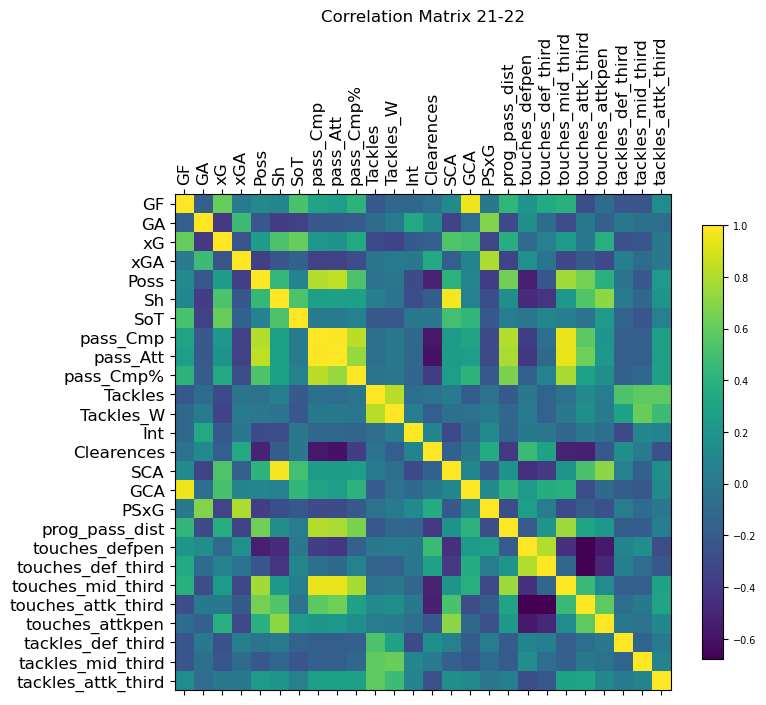

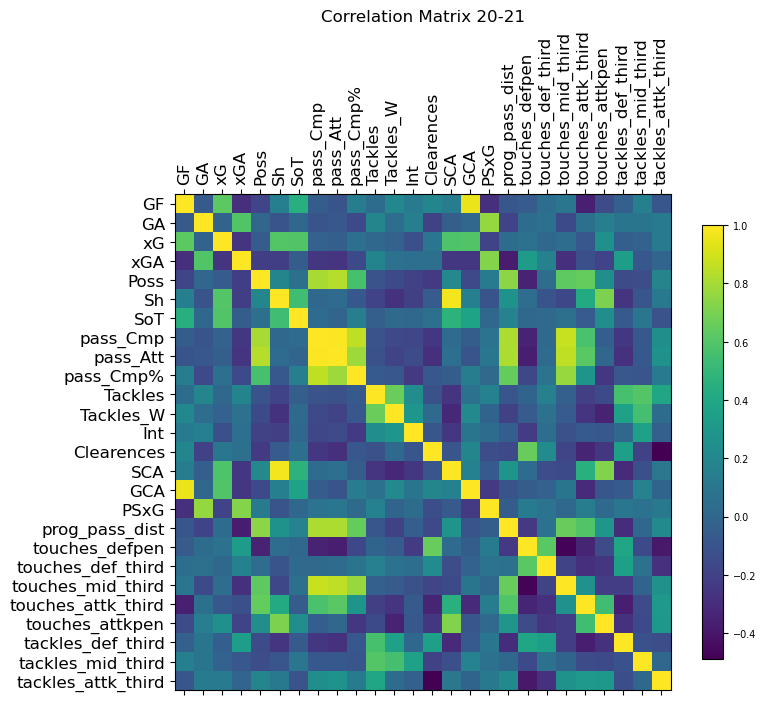

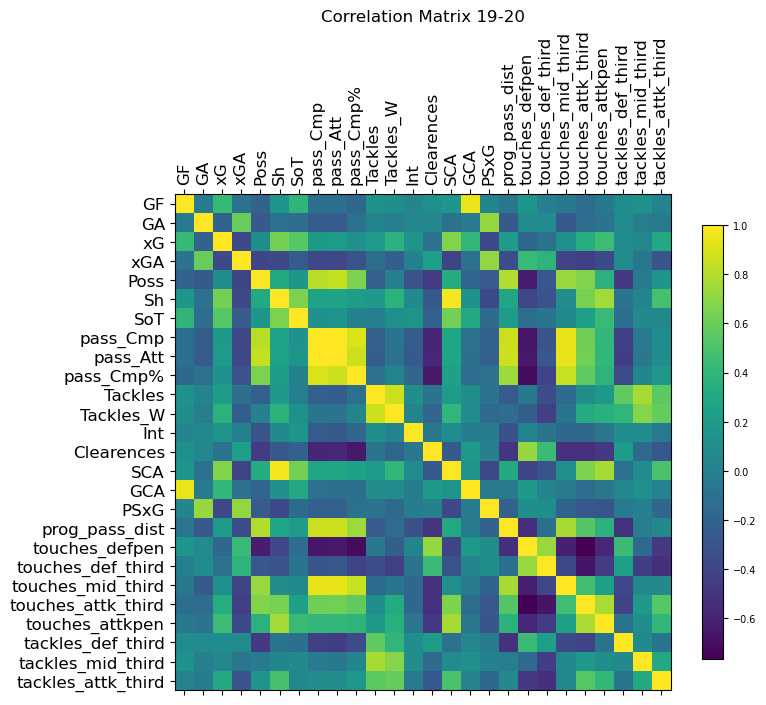

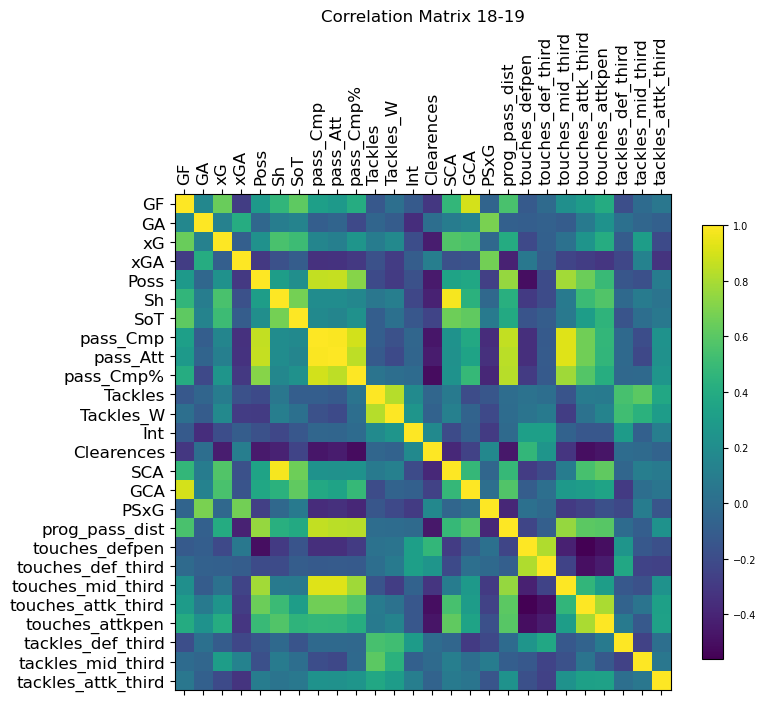

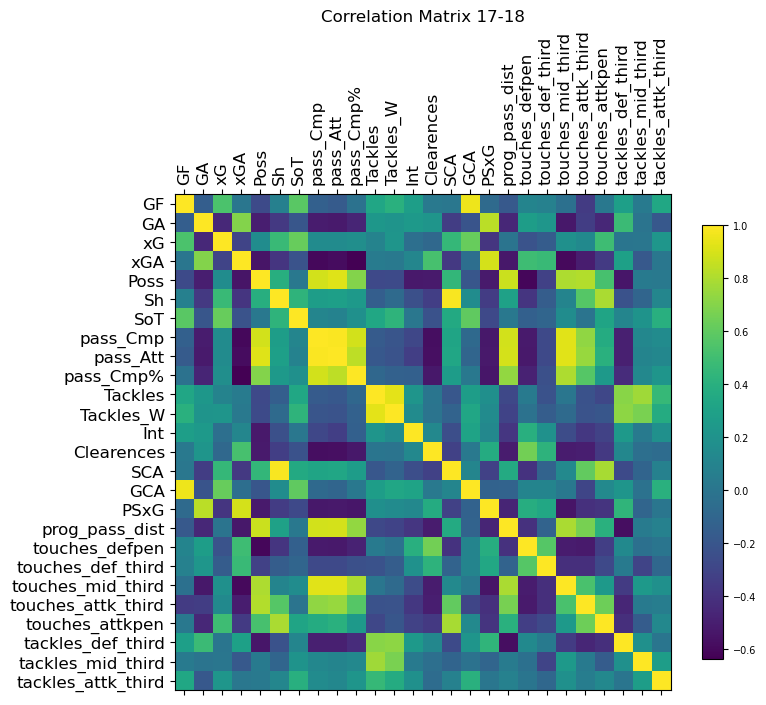

In [31]:
for i in seasons:
    temp = df[df.Season==i]
    f = plt.figure(figsize=(8, 8))
    plt.matshow(temp.corr(), fignum=f.number)
    plt.xticks(range(temp.select_dtypes(['number']).shape[1]), temp.select_dtypes(['number']).columns, fontsize=12, rotation=45)
    plt.yticks(range(temp.select_dtypes(['number']).shape[1]), temp.select_dtypes(['number']).columns, fontsize=12)
    cb = plt.colorbar(shrink=0.7)
    cb.ax.tick_params(labelsize=7)
    plt.xticks(rotation=90)
    plt.title(('Correlation Matrix '+i), fontsize=12);

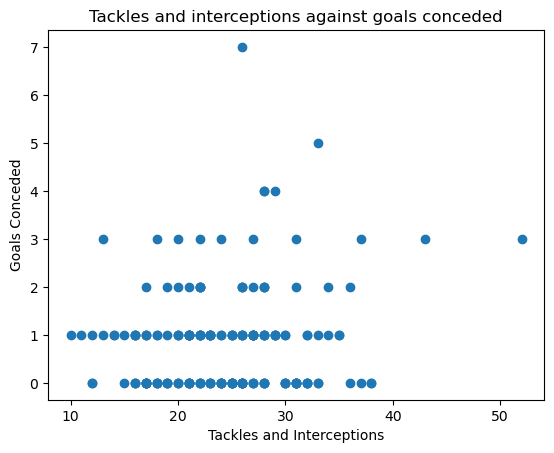

In [32]:
plt.scatter(df.Tackles + df.Int, df.GA, alpha = 1)
plt.xlabel('Tackles and Interceptions')
plt.ylabel('Goals Conceded')
plt.title("Tackles and interceptions against goals conceded")
plt.show()

In [33]:
df.columns

Index(['Season', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA',
       'Poss', 'Sh', 'SoT', 'pass_Cmp', 'pass_Att', 'pass_Cmp%', 'Tackles',
       'Tackles_W', 'Int', 'Clearences', 'SCA', 'GCA', 'PSxG',
       'prog_pass_dist', 'touches_defpen', 'touches_def_third',
       'touches_mid_third', 'touches_attk_third', 'touches_attkpen',
       'tackles_def_third', 'tackles_mid_third', 'tackles_attk_third'],
      dtype='object')

In [34]:
total_goals = []
expected_goals = []
diffneg = []
diffpos = []
for i in seasons:
    try:
        tot_goals = sum(df.GF[df.Season==i])
        exp_goals = sum(df.xG[df.Season==i])
        total_goals.append(tot_goals)
        expected_goals.append(exp_goals)
        a = tot_goals-exp_goals
        diffneg.append(exp_goals-a)
        diffpos.append(tot_goals+a)
    except:
        continue

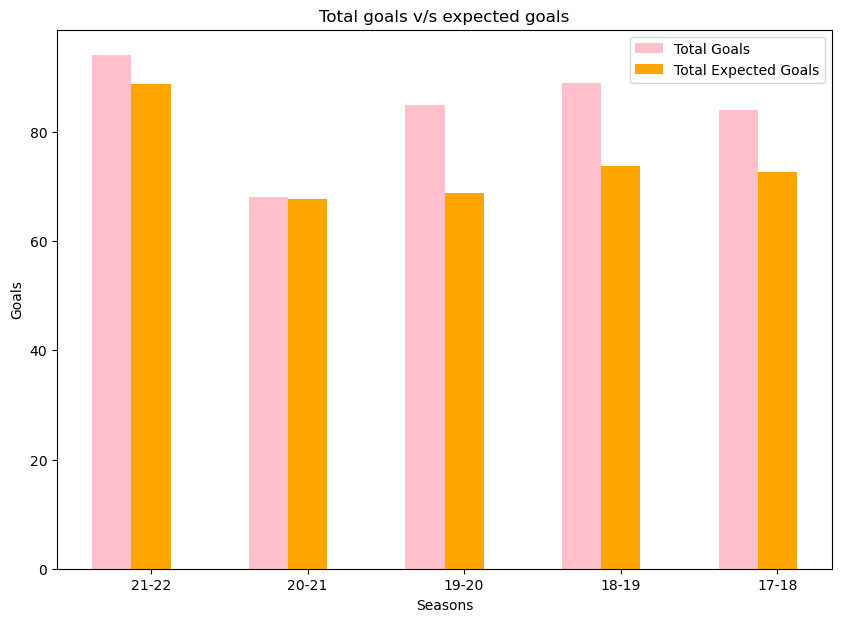

In [35]:
n=5
r = np.arange(n)
width = 0.25
plt.figure(figsize=(10,7))
plt.bar(r, total_goals, label='Total Goals', width=width, color="pink")
plt.bar(r+width, expected_goals, label='Total Expected Goals', width=width, color="orange")
plt.xticks(r+width,seasons)
plt.xlabel('Seasons')
plt.ylabel('Goals')
plt.title("Total goals v/s expected goals")
plt.legend(loc='best')
plt.show()

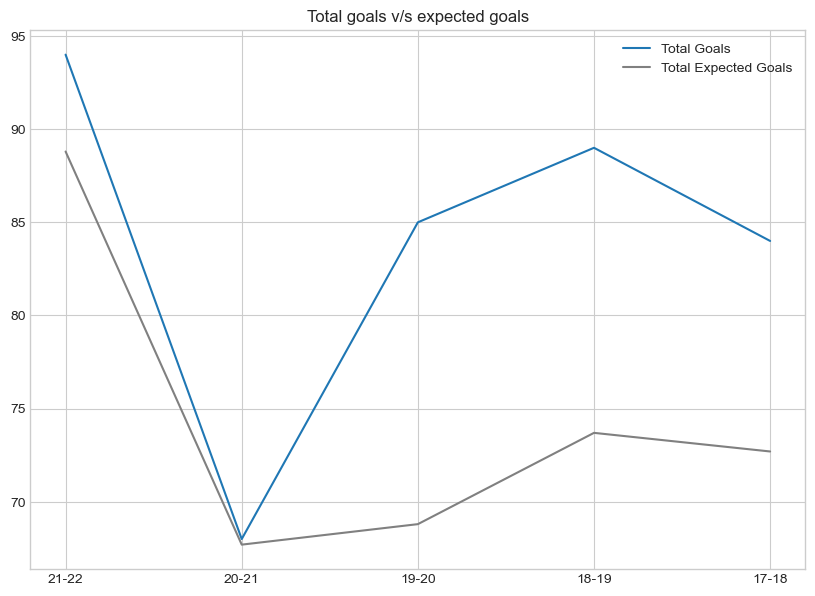

In [68]:
# actual goals vs expected goals depending on season
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.plot(seasons,total_goals, label="Total Goals")
plt.plot(seasons, expected_goals, '-', color='gray', label="Total Expected Goals")
plt.legend()
plt.title("Total goals v/s expected goals")
plt.show()

In [37]:
points = []
for i in seasons:
    tot_points = 0
    temp = df[df.Season == i]
    temp.reset_index(inplace=True)
    for j in temp.index:
        if temp.Result[j] == 'W':
            tot_points += 3
        elif temp.Result[j] == 'D':
            tot_points += 1
        else:
            tot_points += 0
    points.append(tot_points)

In [38]:
points

[92, 69, 99, 97, 75]

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_37840/1929866137.py:1: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(seasons, points,'o')


Text(0.5, 1.0, 'Points Per Season')

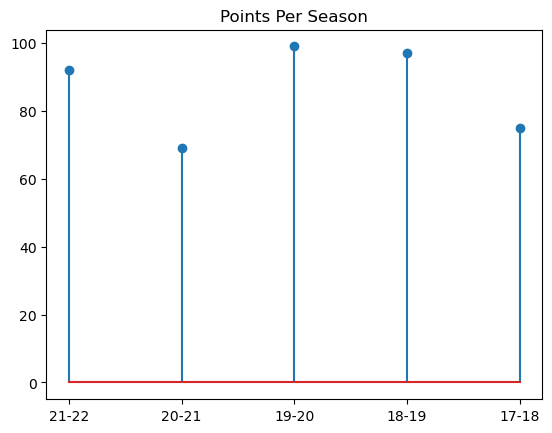

In [39]:
plt.stem(seasons, points,'o')
plt.title("Points Per Season")

In [40]:
df.head(5)

Season Venue Result  GF  GA      Opponent   xG  xGA  Poss  Sh  ...  PSxG  \
0  20-21  Home      W   4   3  Leeds United  2.7  0.3    49  20  ...   0.5   
1  20-21  Away      W   2   0       Chelsea  2.1  0.9    61  18  ...   1.3   
2  20-21  Home      W   3   1       Arsenal  2.7  1.3    66  21  ...   2.0   
3  20-21  Away      L   2   7   Aston Villa  1.8  2.7    69  14  ...   4.7   
4  20-21  Away      D   2   2       Everton  2.6  1.2    58  22  ...   1.2   

   prog_pass_dist  touches_defpen  touches_def_third  touches_mid_third  \
0            2549              35                131                269   
1            3233              29                114                473   
2            3726              50                185                521   
3            3016              70                232                373   
4            2781              54                150                345   

   touches_attk_third  touches_attkpen  tackles_def_third  tackles_mid_third  \
0                 220               44                  2                  7   
1                 317               38                  2                  6   
2                 218               32                  2                  7   
3                 218               43                  5                  7   
4                 185               37                  4                 11   

   tackles_attk_third  
0                   4  
1                   6  
2                   1  
3                   2  
4                   3  

[5 rows x 30 columns]

In [41]:
df.columns

Index(['Season', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA',
       'Poss', 'Sh', 'SoT', 'pass_Cmp', 'pass_Att', 'pass_Cmp%', 'Tackles',
       'Tackles_W', 'Int', 'Clearences', 'SCA', 'GCA', 'PSxG',
       'prog_pass_dist', 'touches_defpen', 'touches_def_third',
       'touches_mid_third', 'touches_attk_third', 'touches_attkpen',
       'tackles_def_third', 'tackles_mid_third', 'tackles_attk_third'],
      dtype='object')

In [42]:
defpen = []
defthird = []
midthird = []
attackthrid = []
attackpen = []
for i in seasons:
    temp = df[df.Season == i]
    total_touches = sum(temp.touches_defpen)+sum(temp.touches_def_third)+sum(temp.touches_mid_third)+sum(temp.touches_attk_third)+sum(temp.touches_attkpen)
    defpen.append(round((sum(temp.touches_defpen)/total_touches)*100, 1))
    defthird.append(round((sum(temp.touches_def_third)/total_touches)*100,1))
    midthird.append(round((sum(temp.touches_mid_third)/total_touches)*100,1))
    attackthrid.append(round((sum(temp.touches_attk_third)/total_touches)*100,1))
    attackpen.append(round((sum(temp.touches_attkpen)/total_touches)*100,1))

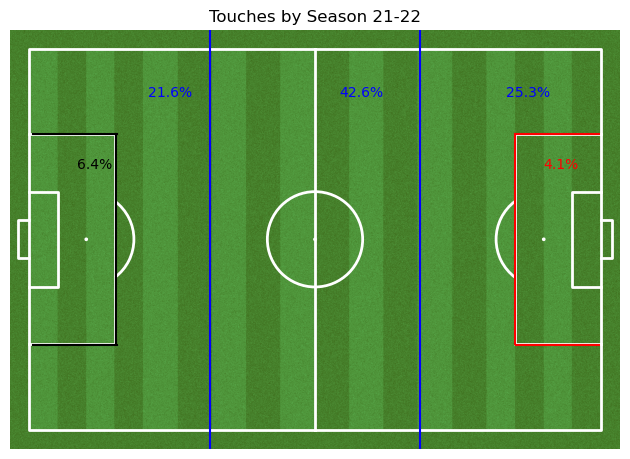

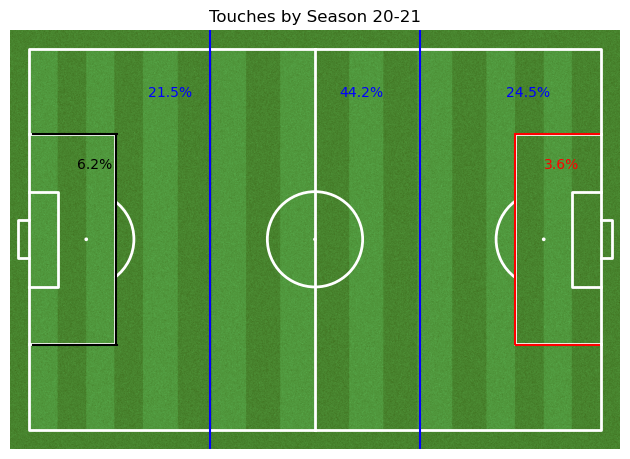

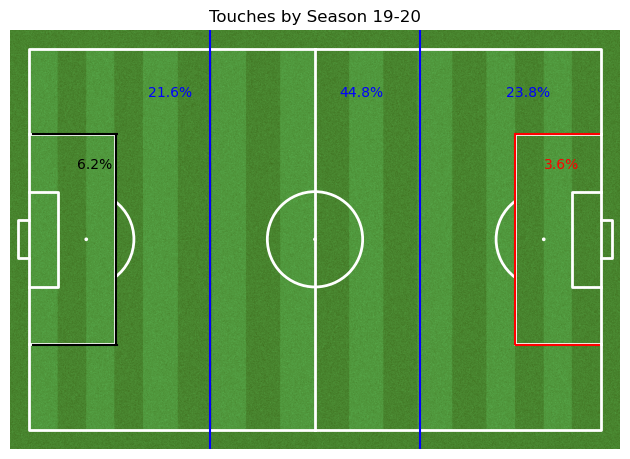

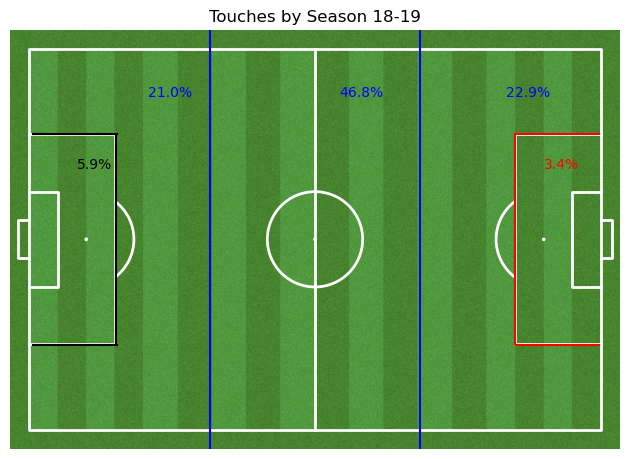

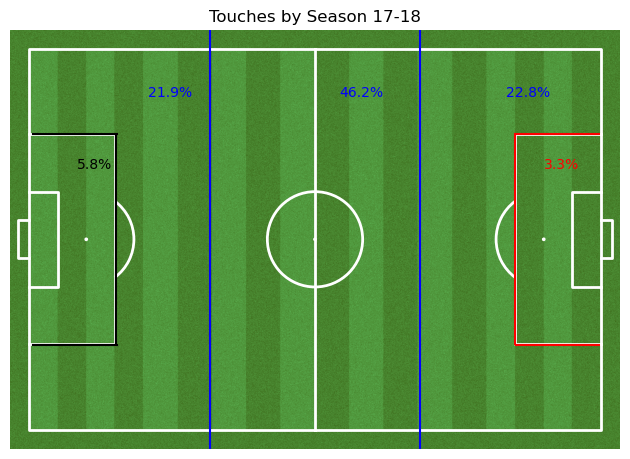

In [43]:
for i in range(len(defpen)):
    pitch = Pitch(pitch_color = 'grass', line_color = 'white', stripe = True,
              goal_type = 'box')
    fig, ax = pitch.draw()
    plt.axvline(x = 38, color = 'b')
    plt.axvline(x = 82, color = 'b')
    plt.axhline(y=18, xmin=0.83, xmax=0.965, color = 'r')
    plt.axhline(y=62.25, xmin=0.83, xmax=0.965, color = 'r')
    plt.axhline(y=62.25, xmin=0.037, xmax=0.175, color = 'black')
    plt.axhline(y=18, xmin=0.037, xmax=0.175, color = 'black')
    plt.axvline(x=102, ymin=0.25, ymax=0.75, color = 'r')
    plt.axvline(x=18.3, ymin=0.25, ymax=0.75, color = 'black')
    ax.text(10, 25, str(defpen[i])+"%", color='black')
    ax.text(25, 10, str(defthird[i])+"%", color='b')
    ax.text(65, 10, str(midthird[i])+"%", color='b')
    ax.text(100, 10, str(attackthrid[i])+"%", color='b')
    ax.text(108, 25, str(attackpen[i])+"%", color='r')
    plt.title("Touches by Season "+seasons[i])
    plt.plot
    plt.show()

In [44]:
df.head(5)

Season Venue Result  GF  GA      Opponent   xG  xGA  Poss  Sh  ...  PSxG  \
0  20-21  Home      W   4   3  Leeds United  2.7  0.3    49  20  ...   0.5   
1  20-21  Away      W   2   0       Chelsea  2.1  0.9    61  18  ...   1.3   
2  20-21  Home      W   3   1       Arsenal  2.7  1.3    66  21  ...   2.0   
3  20-21  Away      L   2   7   Aston Villa  1.8  2.7    69  14  ...   4.7   
4  20-21  Away      D   2   2       Everton  2.6  1.2    58  22  ...   1.2   

   prog_pass_dist  touches_defpen  touches_def_third  touches_mid_third  \
0            2549              35                131                269   
1            3233              29                114                473   
2            3726              50                185                521   
3            3016              70                232                373   
4            2781              54                150                345   

   touches_attk_third  touches_attkpen  tackles_def_third  tackles_mid_third  \
0                 220               44                  2                  7   
1                 317               38                  2                  6   
2                 218               32                  2                  7   
3                 218               43                  5                  7   
4                 185               37                  4                 11   

   tackles_attk_third  
0                   4  
1                   6  
2                   1  
3                   2  
4                   3  

[5 rows x 30 columns]

In [45]:
tackles_def = []
tackles_mid = []
tackles_attk = []
for i in seasons:
    temp = df[df.Season == i]
    total_tackles = sum(temp.tackles_def_third)+sum(temp.tackles_mid_third)+sum(temp.tackles_attk_third)
    tackles_def.append(round((sum(temp.tackles_def_third)/total_tackles)*100, 1))
    tackles_mid.append(round((sum(temp.tackles_mid_third)/total_tackles)*100,1))
    tackles_attk.append(round((sum(temp.tackles_attk_third)/total_tackles)*100,1))

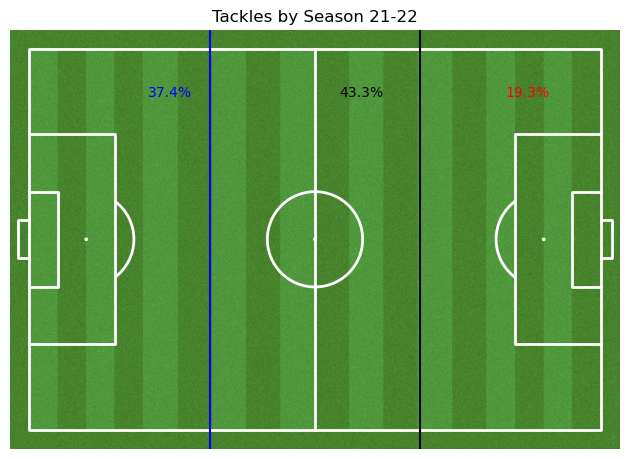

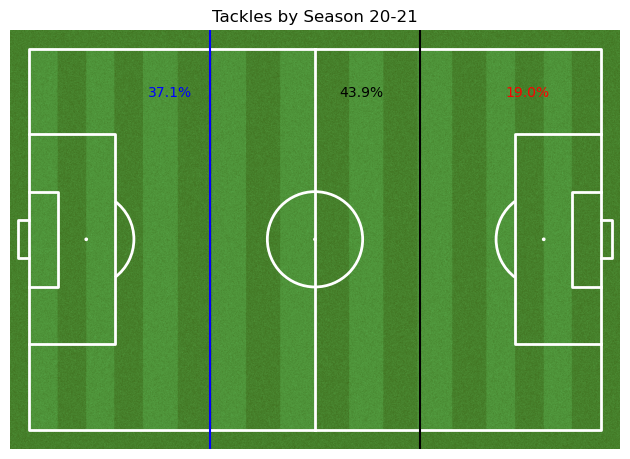

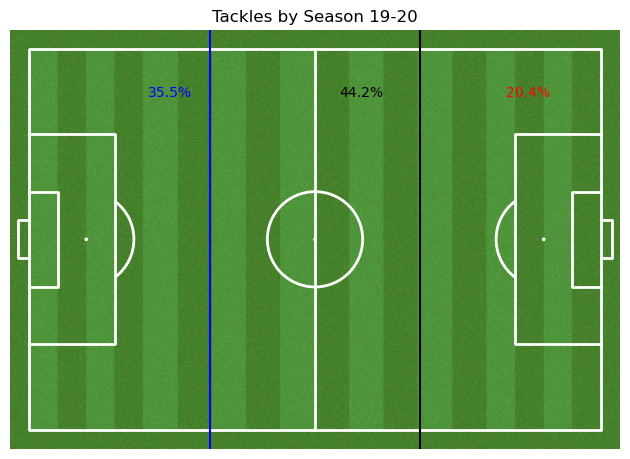

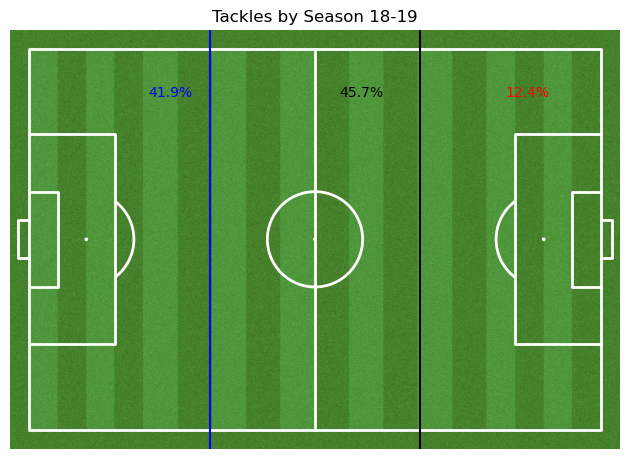

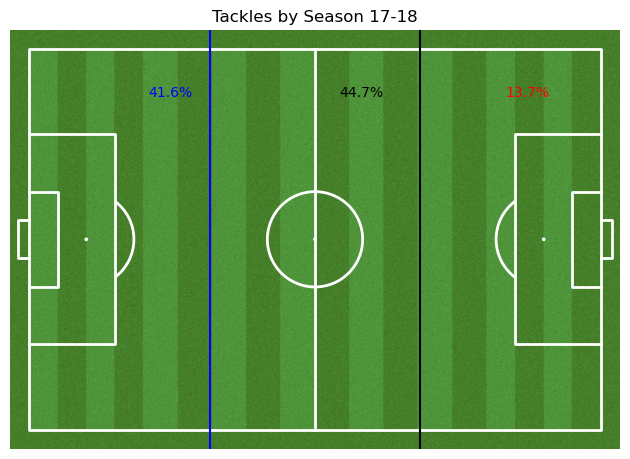

In [46]:
for i in range(len(tackles_def)):
    pitch = Pitch(pitch_color = 'grass', line_color = 'white', stripe = True,
              goal_type = 'box')
    fig, ax = pitch.draw()
    plt.axvline(x = 38, color = 'b')
    plt.axvline(x = 82, color = 'black')
    ax.text(25, 10, str(tackles_def[i])+"%", color='b')
    ax.text(65, 10, str(tackles_mid[i])+"%", color='black')
    ax.text(100, 10, str(tackles_attk[i])+"%", color='r')
    plt.title("Tackles by Season "+seasons[i])
    plt.plot
    plt.show()

In [47]:
players = pd.read_csv("/Users/dhruvishah/Desktop/players.csv") 

In [48]:
players.head(5)

Player Season Pos  Age   90s  Gls  Shots  Shot_ontarget  \
0                 Alisson  21-22  GK   28  36.0    0      0              0   
1         Virgil van Dijk  21-22  DF   30  34.0    3     35             14   
2  Trent Alexander-Arnold  21-22  DF   22  31.7    2     51             15   
3              Sadio Mané  21-22  FW   29  31.3   16     98             37   
4              Joël Matip  21-22  DF   29  31.0    3     35              7   

   PK  PKatt  ...  Tkl_won  Blocks  Int  Touches  Take_ons_Att  Take_ons_Succ  \
0   0      0  ...        1       1    0     1469             1              1   
1   0      0  ...       10      21   31     2894             8              6   
2   0      0  ...       23      22   43     3036            39             19   
3   0      0  ...       20      30    8     1492            77             47   
4   0      0  ...       34      26   44     2651            10              9   

   Carries  Carries_PrgDist   PPM  Mins_Played  
0      873             2223  2.44        3,240  
1     1717             3379  2.41        3,060  
2     1504             2824  2.38        2,853  
3     1027             2663  2.35        2,819  
4     1612             7174  2.48        2,790  

[5 rows x 30 columns]

In [49]:
players.columns

Index(['Player', 'Season', 'Pos', 'Age', '90s', 'Gls', 'Shots',
       'Shot_ontarget', 'PK', 'PKatt', 'xG', 'npxG', 'Pass_Cmp', 'pass_Att',
       'pass_Cmp%', 'pass_PrgDist', 'Ast', 'xAG', 'xA', 'Tkl', 'Tkl_won',
       'Blocks', 'Int', 'Touches', 'Take_ons_Att', 'Take_ons_Succ', 'Carries',
       'Carries_PrgDist', 'PPM', 'Mins_Played'],
      dtype='object')

In [50]:
import seaborn as sns

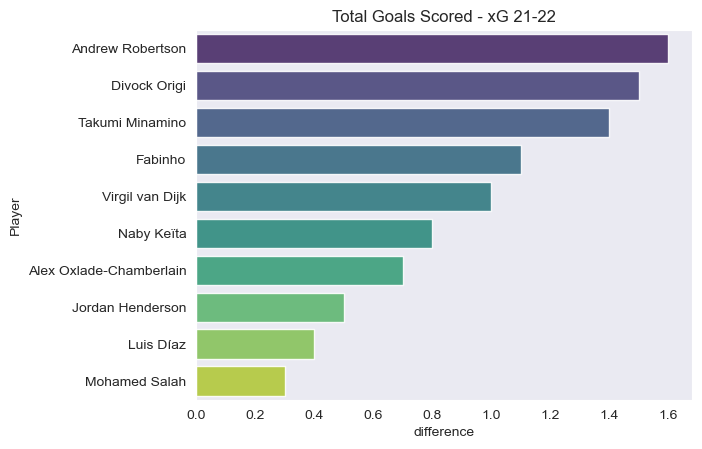

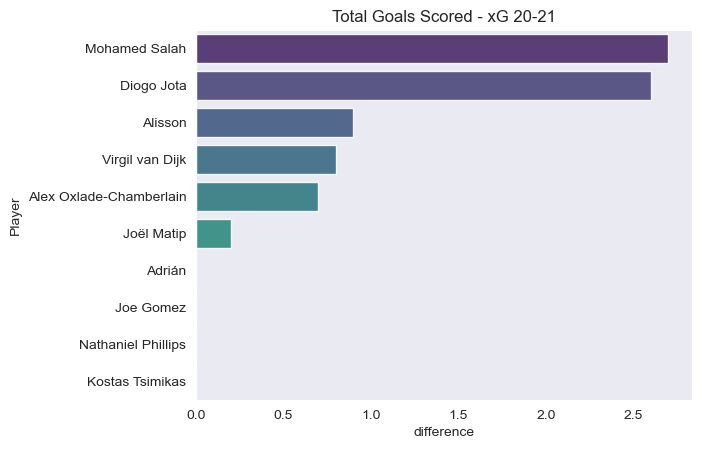

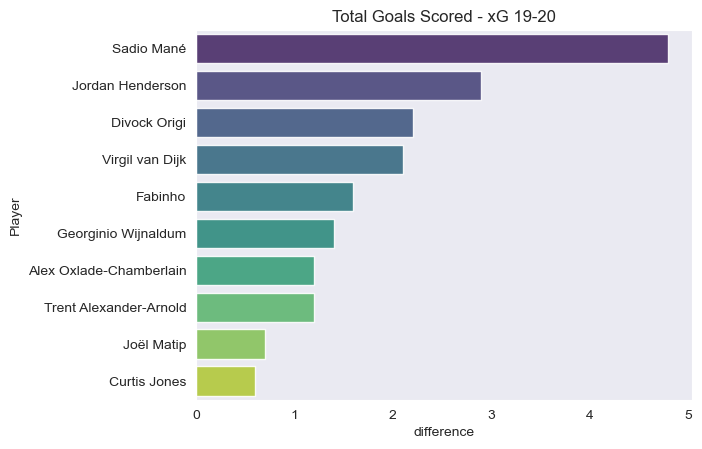

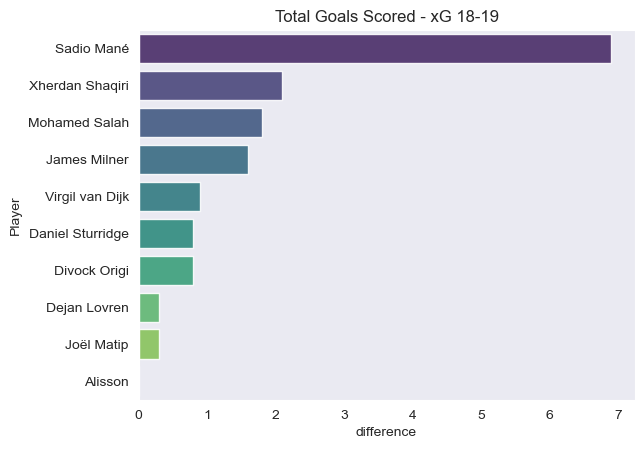

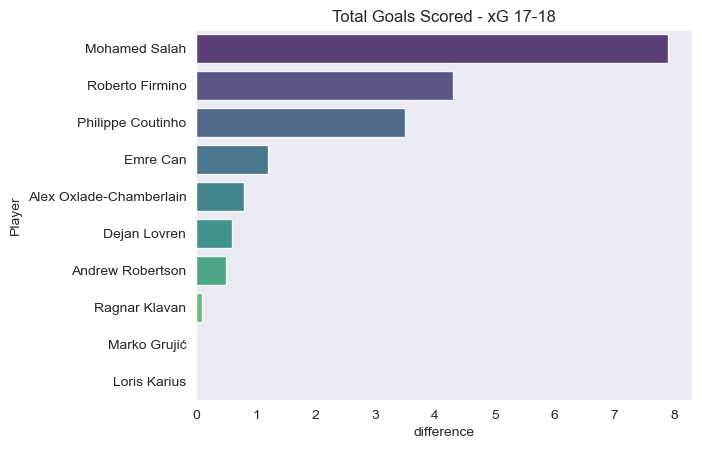

In [65]:
sns.set_style("dark")
for i in seasons:
    temp = players[players.Season == i]
    temp = temp.groupby('Player').sum().reset_index()
    temp["difference"] = temp.Gls-temp.xG
    temp.sort_values(by=["difference"], inplace=True, ascending=False)
    sns.barplot(x=temp.difference[0:10], y=temp.Player[0:10],palette='viridis', alpha=0.9)
    plt.title("Total Goals Scored - xG " + i)
    plt.show()

In [52]:
ax = players.groupby('Player').sum().reset_index()
ax["difference"] = ax.Gls-ax.xG

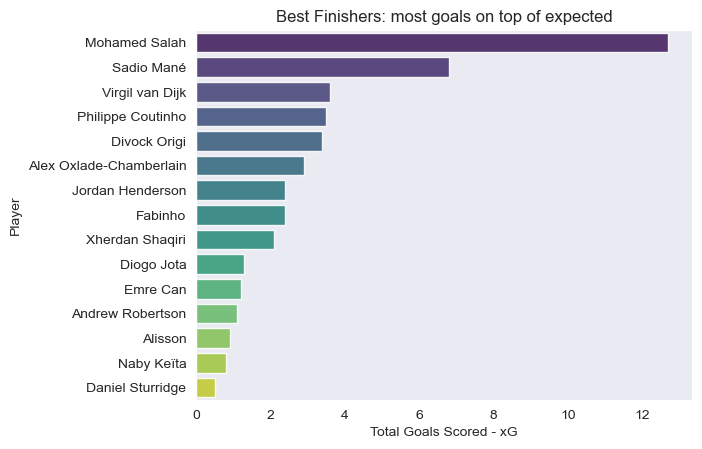

In [61]:
ax.sort_values(by=["difference"], inplace=True, ascending=False)
sns.barplot(x=ax.difference[0:15], y=ax.Player[0:15],palette='viridis', alpha=0.9)
plt.title("Best Finishers: most goals on top of expected")
plt.xlabel("Total Goals Scored - xG")
plt.show()

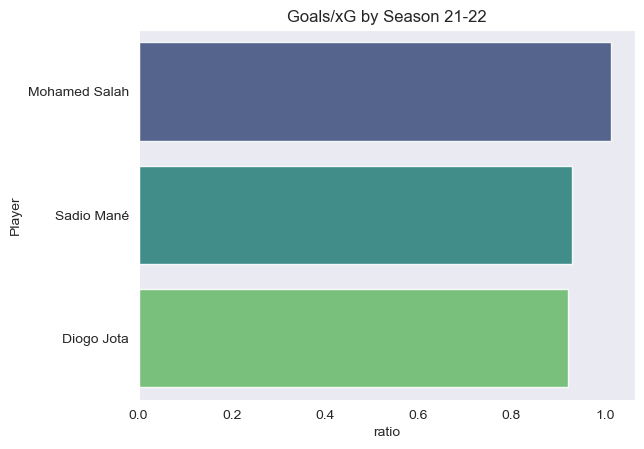

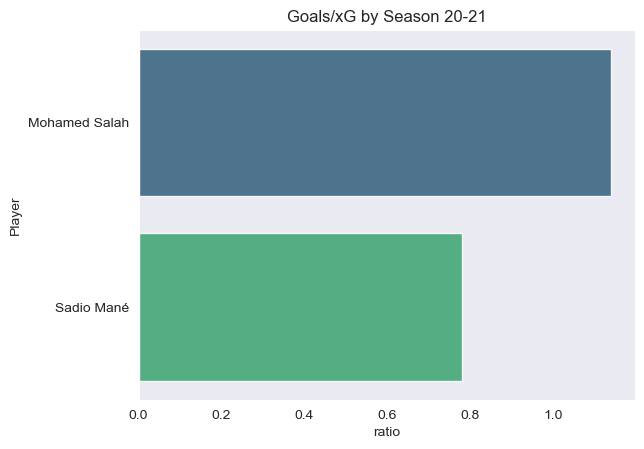

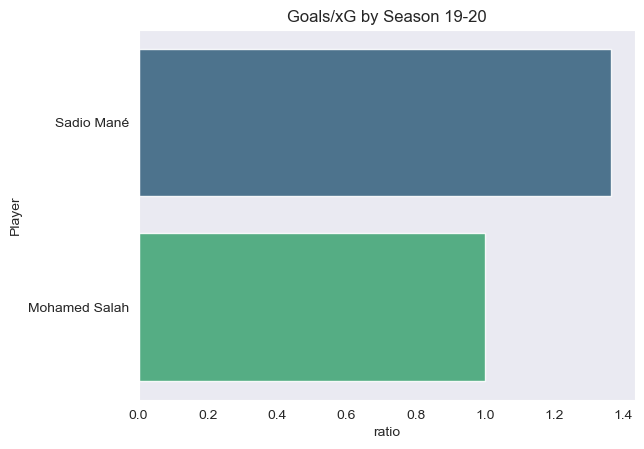

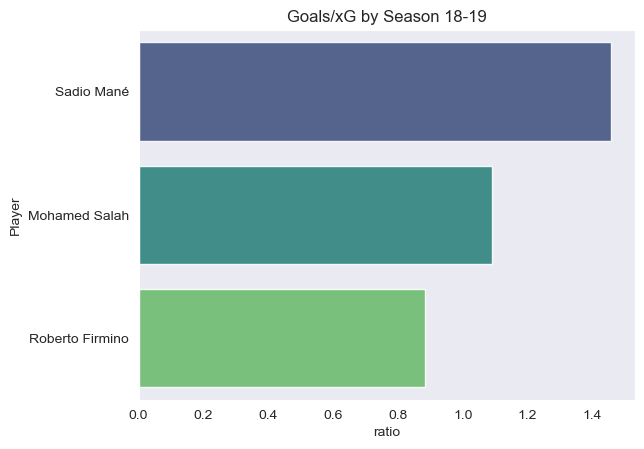

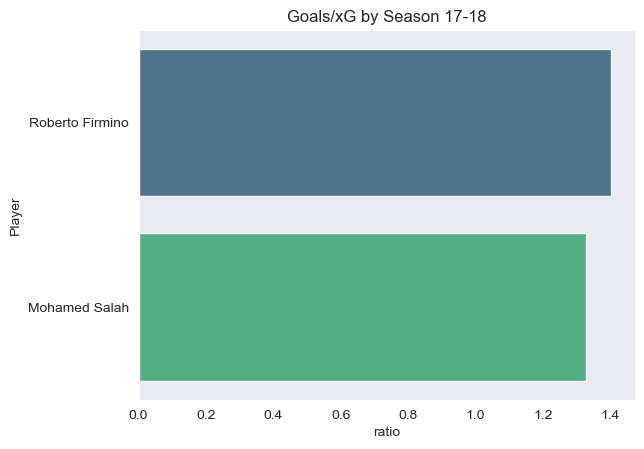

In [57]:
sns.set_style("dark")
for i in seasons:
    temp = players[players.Season == i]
    temp = temp.groupby('Player').sum().reset_index()
    temp["ratio"] = temp.Gls/temp.xG
    temp = temp[temp.Gls>10]
    temp.sort_values(by=["ratio"], inplace=True, ascending=False)
    sns.barplot(x=temp.ratio[0:10], y=temp.Player[0:10],palette='viridis', alpha=0.9)
    plt.title("Goals/xG by Season " + i)
    plt.show()

In [55]:
bx = players.groupby('Player').sum().reset_index()
bx["ratio"] = bx.Gls/bx.xG

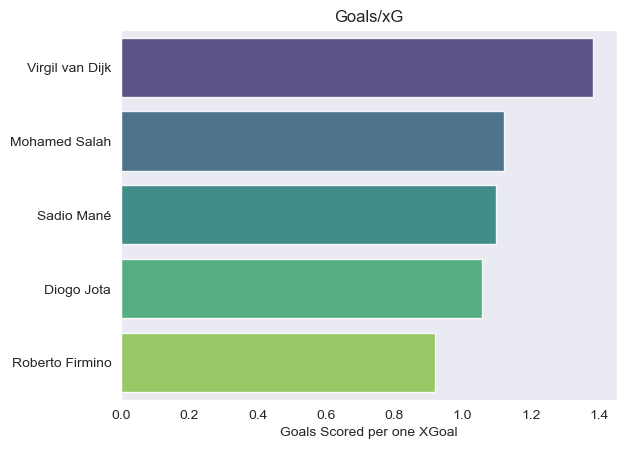

In [58]:
bx = bx[bx.Gls>10]
bx.sort_values(by=["ratio"], inplace=True, ascending=False)
sns.barplot(x=bx.ratio[0:10], y=bx.Player[0:10],palette='viridis', alpha=0.9)
plt.xlabel('Goals Scored per one XGoal')
plt.ylabel(ylabel='')
plt.title("Goals/xG")
plt.show()